In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [42]:
lgbm_preds = pd.read_csv('../data/lgbm_preds.csv')
sgd_preds = pd.read_csv('../data/sgd_preds.csv')


In [43]:
lgbm_preds['HOME_WL_PRED'] = (lgbm_preds['HOME_SCORE_PRED'] > lgbm_preds['AWAY_SCORE_PRED']).astype(int)

lgbm_preds['ML_BET_CORRECT'] = (lgbm_preds['HOME_WL_PRED'] == lgbm_preds['HOME_WL']).astype(int)
lgbm_preds['HOME_COVER_PRED'] = (lgbm_preds['AWAY_SCORE_PRED'] - lgbm_preds['HOME_SCORE_PRED'] < lgbm_preds['HOME_SPREAD']).astype(int)

lgbm_preds['ATS_BET_CORRECT'] = (lgbm_preds['HOME_COVER_PRED'] == lgbm_preds['HOME_TEAM_COVERED']).astype(int)
lgbm_preds

,SEASON,HOME_TEAM_ABBREVIATION,GAME_DATE,GAME_ID,MATCHUP,HOME_HOME_GAME,HOME_TEAM_SCORE,HOME_ML,HOME_SPREAD,HOME_ATS_DIFF,...,HOME_POINT_DIFF,HOME_WL,AWAY_ML,AWAY_TEAM_SCORE,HOME_SCORE_PRED,AWAY_SCORE_PRED,HOME_WL_PRED,ML_BET_CORRECT,HOME_COVER_PRED,ATS_BET_CORRECT
0,2021-22,LAL,2021-10-22 00:00:00,22100025,LAL vs. PHX,1,105,1.909091,-3.5,-13.5,...,-10,0,1.909091,115,102.370220,109.398763,0,1,0,1
1,2021-22,DEN,2021-10-22 00:00:00,22100024,DEN vs. SAS,1,102,1.357143,-7.0,-1.0,...,6,1,3.400000,96,117.799738,114.946617,1,1,0,1
2,2021-22,HOU,2021-10-22 00:00:00,22100023,HOU vs. OKC,1,124,1.800000,-1.5,31.5,...,33,1,2.050000,91,117.186012,110.529161,1,1,1,1
3,2021-22,CHI,2021-10-22 00:00:00,22100022,CHI vs. NOP,1,128,1.370370,-7.0,9.0,...,16,1,3.300000,112,113.556102,104.494941,1,1,1,1
4,2021-22,SAC,2021-10-22 00:00:00,22100026,SAC vs. UTA,1,101,2.900000,5.5,-3.5,...,-9,0,1.454545,110,110.732679,113.679173,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2021-22,GSW,2022-06-05 00:00:00,42100402,GSW vs. BOS,1,107,1.500000,-5.5,13.5,...,19,1,2.700000,88,106.781109,103.212457,1,1,0,0
1230,2021-22,BOS,2022-06-08 00:00:00,42100403,BOS vs. GSW,1,116,1.598802,-3.5,12.5,...,16,1,2.350000,100,109.950092,101.967534,1,1,1,1
1231,2021-22,BOS,2022-06-10 00:00:00,42100404,BOS vs. GSW,1,97,1.549451,-4.0,-14.0,...,-10,0,2.400000,107,102.279826,102.685080,0,1,0,1
1232,2021-22,GSW,2022-06-13 00:00:00,42100405,GSW vs. BOS,1,104,1.549451,-4.0,6.0,...,10,1,2.500000,94,109.234147,102.719574,1,1,1,1


In [25]:
lgbm_preds['ATS_BET_CORRECT'].mean()

0.5858995137763371

In [31]:
lgbm_preds = pd.read_csv('../data/lgbm_preds.csv')
sgd_preds = pd.read_csv('../data/sgd_preds.csv')

lgbm_preds['HOME_WL_PRED'] = (lgbm_preds['HOME_SCORE_PRED'] > lgbm_preds['AWAY_SCORE_PRED']).astype(int)
lgbm_preds['ML_BET_CORRECT'] = (lgbm_preds['HOME_WL_PRED'] == lgbm_preds['HOME_WL']).astype(int)
lgbm_preds['HOME_COVER_PRED'] = (lgbm_preds['AWAY_SCORE_PRED'] - lgbm_preds['HOME_SCORE_PRED'] < lgbm_preds['HOME_SPREAD']).astype(int)
lgbm_preds['bet_won'] = (lgbm_preds['HOME_COVER_PRED'] == lgbm_preds['HOME_TEAM_COVERED']).astype(int)

lgbm_preds['bet_won'].mean()



0.5761750405186385

In [32]:
sgd_preds['HOME_WL_PRED'] = (sgd_preds['HOME_SCORE_PRED'] > sgd_preds['AWAY_SCORE_PRED']).astype(int)
sgd_preds['ML_BET_CORRECT'] = (sgd_preds['HOME_WL_PRED'] == sgd_preds['HOME_WL']).astype(int)
sgd_preds['HOME_COVER_PRED'] = (sgd_preds['AWAY_SCORE_PRED'] - sgd_preds['HOME_SCORE_PRED'] < sgd_preds['HOME_SPREAD']).astype(int)
sgd_preds['bet_won'] = (sgd_preds['HOME_COVER_PRED'] == sgd_preds['HOME_TEAM_COVERED']).astype(int)

sgd_preds['bet_won'].mean()


0.5769854132901134

In [35]:
def simulate_bets_1(selected_bets, unit_size):
    """This function simulates betting unit_size of your bankroll on each bet in the
    selected_bets df"""
    selected_bets = selected_bets.copy()
    selected_bets = selected_bets.reset_index()
    selected_bets.loc[0, 'bankroll_i'] = 100
    for idx in range(selected_bets.shape[0]):
        if np.isnan(selected_bets.loc[idx, 'bankroll_i']):
            selected_bets.loc[idx, 'bankroll_i'] = selected_bets.loc[idx-1, 'bankroll_n']

        selected_bets.loc[idx, 'bet_size'] = unit_size
        if selected_bets.loc[idx, 'bet_won'] == 1:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i'] + (1/1.1)*selected_bets.loc[idx, 'bet_size']
        elif selected_bets.loc[idx, 'bet_won'] == 0:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i'] - selected_bets.loc[idx, 'bet_size']
        else:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i']
            
    plt.style.use('fivethirtyeight')

    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(range(selected_bets.shape[0]), selected_bets['bankroll_i'], linewidth=1.5)
    ax.set_ylabel("Bankroll")
    ax.set_xlabel("Games Bet")
    plt.show()
    min_balance = selected_bets['bankroll_n'].min()
    max_balance = selected_bets['bankroll_n'].max()
    final_balance = selected_bets['bankroll_n'].iloc[-1]
    win_pct = selected_bets.loc[selected_bets['bet_won'] != 0.5, 'bet_won'].mean()
    
    amt_won = selected_bets.loc[selected_bets['bet_won'] ==1, 'bet_size'].sum() * 1/1.1
    amt_lost = selected_bets.loc[selected_bets['bet_won']==0, 'bet_size'].sum()
    amt_risked = selected_bets['bet_size'].sum()

    profit = amt_won - amt_lost
    roi = profit/amt_risked
    
    print("min balance:", min_balance,
         "\nmax balance:", max_balance,
         "\nfinal balance:", final_balance,
         "\nwin percentage", round(win_pct, 4) * 100,
         "\nprofit:", profit, "risk:", amt_risked,
         "\nROI:", round(roi, 4) * 100)
    return selected_bets, roi, profit, win_pct

def simulate_bets_2(selected_bets, unit_pct=0.03):
    """This function simulates betting unit_size (default 3%) of your bankroll on each bet in the
    selected_bets df"""
    selected_bets = selected_bets.copy()
    selected_bets = selected_bets.reset_index()
    selected_bets.loc[0, 'bankroll_i'] = 100
    for idx in range(selected_bets.shape[0]):
        if np.isnan(selected_bets.loc[idx, 'bankroll_i']):
            selected_bets.loc[idx, 'bankroll_i'] = selected_bets.loc[idx-1, 'bankroll_n']

        selected_bets.loc[idx, 'bet_size'] = selected_bets.loc[idx, 'bankroll_i'] * unit_pct
        if selected_bets.loc[idx, 'bet_won'] == 1:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i'] + (1/1.1)*selected_bets.loc[idx, 'bet_size']
        elif selected_bets.loc[idx, 'bet_won'] == 0:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i'] - selected_bets.loc[idx, 'bet_size']
        else:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i']
            
    plt.style.use('fivethirtyeight')

    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(range(selected_bets.shape[0]), selected_bets['bankroll_i'], linewidth=1.5)
    ax.set_ylabel("Bankroll")
    ax.set_xlabel("Games Bet")
    plt.show()
    min_balance = selected_bets['bankroll_n'].min()
    max_balance = selected_bets['bankroll_n'].max()
    final_balance = selected_bets['bankroll_n'].iloc[-1]
    win_pct = selected_bets.loc[selected_bets['bet_won'] != 0.5, 'bet_won'].mean()
    
    amt_won = selected_bets.loc[selected_bets['bet_won'] ==1, 'bet_size'].sum() * 1/1.1
    amt_lost = selected_bets.loc[selected_bets['bet_won']==0, 'bet_size'].sum()
    amt_risked = selected_bets['bet_size'].sum()

    profit = amt_won - amt_lost
    roi = profit/amt_risked
    
    print("min balance:", min_balance,
         "\nmax balance:", max_balance,
         "\nfinal balance:", final_balance,
         "\nwin percentage", round(win_pct, 4) * 100,
         "\nprofit:", profit, "risk:", amt_risked,
         "\nROI:", round(roi, 4) * 100)
    return selected_bets, roi, profit, win_pct


def simulate_bets_3(selected_bets):
    """This function simulates betting unit_size (default 3%) of your bankroll on each bet in the
    selected_bets df"""
    selected_bets = selected_bets.copy()
    selected_bets = selected_bets.reset_index()
    selected_bets.loc[0, 'bankroll_i'] = 100
    for idx in range(selected_bets.shape[0]):
        if np.isnan(selected_bets.loc[idx, 'bankroll_i']):
            selected_bets.loc[idx, 'bankroll_i'] = selected_bets.loc[idx-1, 'bankroll_n']

        if abs(selected_bets.at[idx, 'prob_avg']-0.5) > 0.05:
            bet_size = 4
        elif abs(selected_bets.at[idx, 'prob_avg']-0.5) > 0.04:
            bet_size = 3
        elif abs(selected_bets.at[idx, 'prob_avg']-0.5) >= 0.03:
            bet_size = 2
        elif abs(selected_bets.at[idx, 'prob_avg']-0.5) > 0.01:
            bet_size = 2
        else:
            bet_size = 1
            
        selected_bets.at[idx, 'bet_size'] = bet_size
        if selected_bets.at[idx, 'bet_won'] == 1:
            selected_bets.at[idx, 'bankroll_n'] = selected_bets.at[idx, 'bankroll_i'] + (1/1.1)*selected_bets.loc[idx, 'bet_size']
        elif selected_bets.at[idx, 'bet_won'] == 0:
            selected_bets.at[idx, 'bankroll_n'] = selected_bets.at[idx, 'bankroll_i'] - selected_bets.at[idx, 'bet_size']
        else:
            selected_bets.at[idx, 'bankroll_n'] = selected_bets.at[idx, 'bankroll_i']
            
    plt.style.use('fivethirtyeight')

    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(range(selected_bets.shape[0]), selected_bets['bankroll_i'], linewidth=1.5)
    ax.set_ylabel("Bankroll")
    ax.set_xlabel("Games Bet")
    plt.show()
    min_balance = selected_bets['bankroll_n'].min()
    max_balance = selected_bets['bankroll_n'].max()
    final_balance = selected_bets['bankroll_n'].iloc[-1]
    win_pct = selected_bets.loc[selected_bets['bet_won'] != 0.5, 'bet_won'].mean()
    
    amt_won = selected_bets.loc[selected_bets['bet_won'] ==1, 'bet_size'].sum() * 1/1.1
    amt_lost = selected_bets.loc[selected_bets['bet_won']==0, 'bet_size'].sum()
    amt_risked = selected_bets['bet_size'].sum()

    profit = amt_won - amt_lost
    roi = profit/amt_risked
    
    print("min balance:", min_balance,
         "\nmax balance:", max_balance,
         "\nfinal balance:", final_balance,
         "\nwin percentage", round(win_pct, 4) * 100,
         "\nprofit:", profit, "risk:", amt_risked,
         "\nROI:", round(roi, 4) * 100)
    return selected_bets, roi, profit, win_pct

def simulate_bets_4(selected_bets):
    """This function simulates betting unit_size (default 3%) of your bankroll on each bet in the
    selected_bets df"""
    selected_bets = selected_bets.copy()
    selected_bets = selected_bets.reset_index()
    selected_bets.loc[0, 'bankroll_i'] = 100
    for idx in range(selected_bets.shape[0]):
        if np.isnan(selected_bets.loc[idx, 'bankroll_i']):
            selected_bets.loc[idx, 'bankroll_i'] = selected_bets.loc[idx-1, 'bankroll_n']

        if abs(selected_bets.at[idx, 'prob_avg']-0.5) > 0.04:
            bet_size = 0.05
        elif abs(selected_bets.at[idx, 'prob_avg']-0.5) > 0.03:
            bet_size = 0.04
        elif abs(selected_bets.at[idx, 'prob_avg']-0.5) > 0.02:
            bet_size = 0.03
        elif abs(selected_bets.at[idx, 'prob_avg']-0.5) > 0.01:
            bet_size = 0.02
        else:
            bet_size = 0.01
        
        selected_bets.loc[idx, 'bankroll_i'] = selected_bets.loc[idx-1, 'bankroll_n']

        selected_bets.loc[idx, 'bet_size'] = selected_bets.loc[idx, 'bankroll_i'] * bet_size
        if selected_bets.loc[idx, 'bet_won'] == 1:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i'] + (1/1.1)*selected_bets.loc[idx, 'bet_size']
        elif selected_bets.loc[idx, 'bet_won'] == 0:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i'] - selected_bets.loc[idx, 'bet_size']
        else:
            selected_bets.loc[idx, 'bankroll_n'] = selected_bets.loc[idx, 'bankroll_i']
            
            
    plt.style.use('fivethirtyeight')

    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(range(selected_bets.shape[0]), selected_bets['bankroll_i'], linewidth=1.5)
    ax.set_ylabel("Bankroll")
    ax.set_xlabel("Games Bet")
    plt.show()
    min_balance = selected_bets['bankroll_n'].min()
    max_balance = selected_bets['bankroll_n'].max()
    final_balance = selected_bets['bankroll_n'].iloc[-1]
    win_pct = selected_bets.loc[selected_bets['bet_won'] != 0.5, 'bet_won'].mean()
    
    amt_won = selected_bets.loc[selected_bets['bet_won'] ==1, 'bet_size'].sum() * 1/1.1
    amt_lost = selected_bets.loc[selected_bets['bet_won']==0, 'bet_size'].sum()
    amt_risked = selected_bets['bet_size'].sum()

    profit = amt_won - amt_lost
    roi = profit/amt_risked
    
    print("min balance:", min_balance,
         "\nmax balance:", max_balance,
         "\nfinal balance:", final_balance,
         "\nwin percentage", round(win_pct, 4) * 100,
         "\nprofit:", profit, "risk:", amt_risked,
         "\nROI:", round(roi, 4) * 100)
    return selected_bets, roi, profit, win_pct


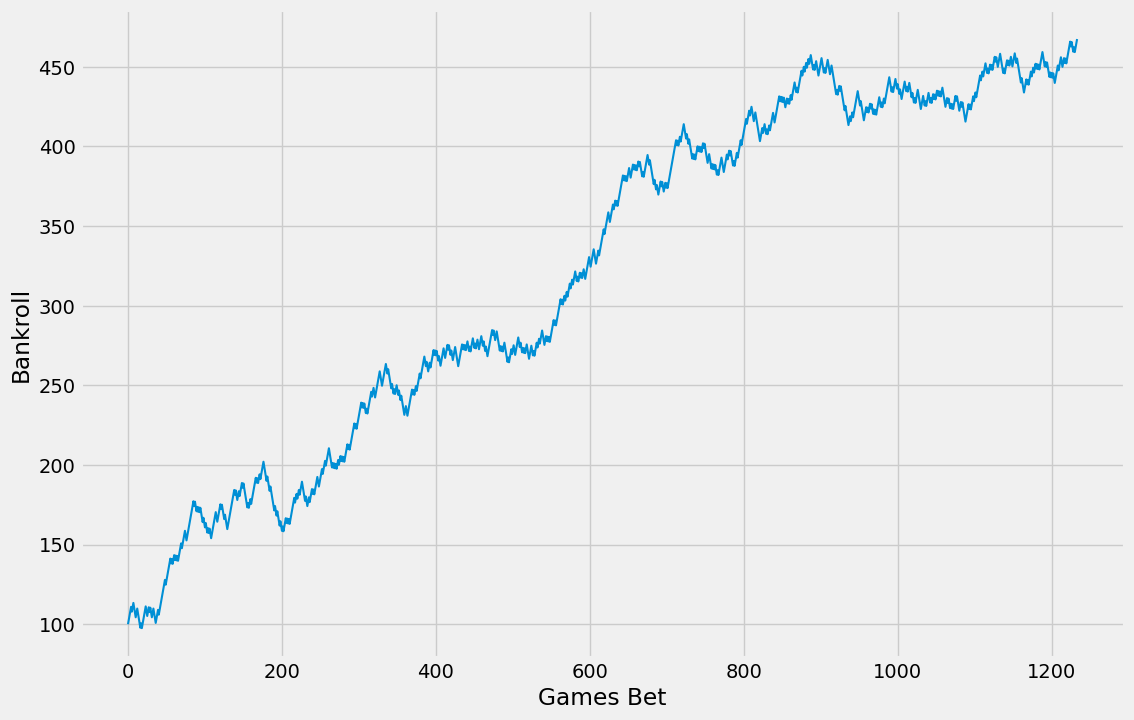

min balance: 97.5454545454546 
max balance: 470.090909090918 
final balance: 470.090909090918 
win percentage 57.620000000000005 
profit: 370.090909090909 risk: 3702.0 
ROI: 10.0


In [39]:
bet_results_1, roi, profit, win_pct = simulate_bets_1(lgbm_preds, unit_size=3)

In [41]:
bet_results_1[['HOME_TEAM_SCORE', 'AWAY_TEAM_SCORE', 'HOME_SCORE_PRED', 
               'AWAY_SCORE_PRED', 'HOME_WL_PRED', 'ML_BET_CORRECT', 
               'HOME_COVER_PRED', 'bet_won', 'bankroll_i', 'bet_size',
               'bankroll_n']]

,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,HOME_SCORE_PRED,AWAY_SCORE_PRED,HOME_WL_PRED,ML_BET_CORRECT,HOME_COVER_PRED,bet_won,bankroll_i,bet_size,bankroll_n
0,105,115,102.370220,109.398763,0,1,0,1,100.000000,3.0,102.727273
1,102,96,117.799738,114.946617,1,1,0,1,102.727273,3.0,105.454545
2,124,91,117.186012,110.529161,1,1,1,1,105.454545,3.0,108.181818
3,128,112,113.556102,104.494941,1,1,1,1,108.181818,3.0,110.909091
4,101,110,110.732679,113.679173,0,1,1,0,110.909091,3.0,107.909091
...,...,...,...,...,...,...,...,...,...,...,...
1229,107,88,106.781109,103.212457,1,1,0,0,462.181818,3.0,459.181818
1230,116,100,109.950092,101.967534,1,1,1,1,459.181818,3.0,461.909091
1231,97,107,102.279826,102.685080,0,1,0,1,461.909091,3.0,464.636364
1232,104,94,109.234147,102.719574,1,1,1,1,464.636364,3.0,467.363636
